# Final Project Data Analysis
## Dataset Analysis and Insights

This notebook contains a comprehensive analysis of the train.csv dataset, including:
- Exploratory Data Analysis (EDA)
- Outlier Detection and Treatment
- Missing Value Handling
- Feature Engineering
- Key Insights and Findings

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set style for plotting
sns.set_style("whitegrid")

## Data Loading
Let's load our dataset and take a first look at its structure.

In [ ]:
# Read the dataset
df = pd.read_csv('train.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
display(df.head())
print("\nBasic statistics:")
display(df.describe())

Dataset Shape: (1460, 81)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Basic statistics:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploratory Data Analysis

### Data Types and Missing Values
Let's analyze the data types of our columns and check for any missing values in our dataset.

Missing Values Summary:


,Missing Values,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


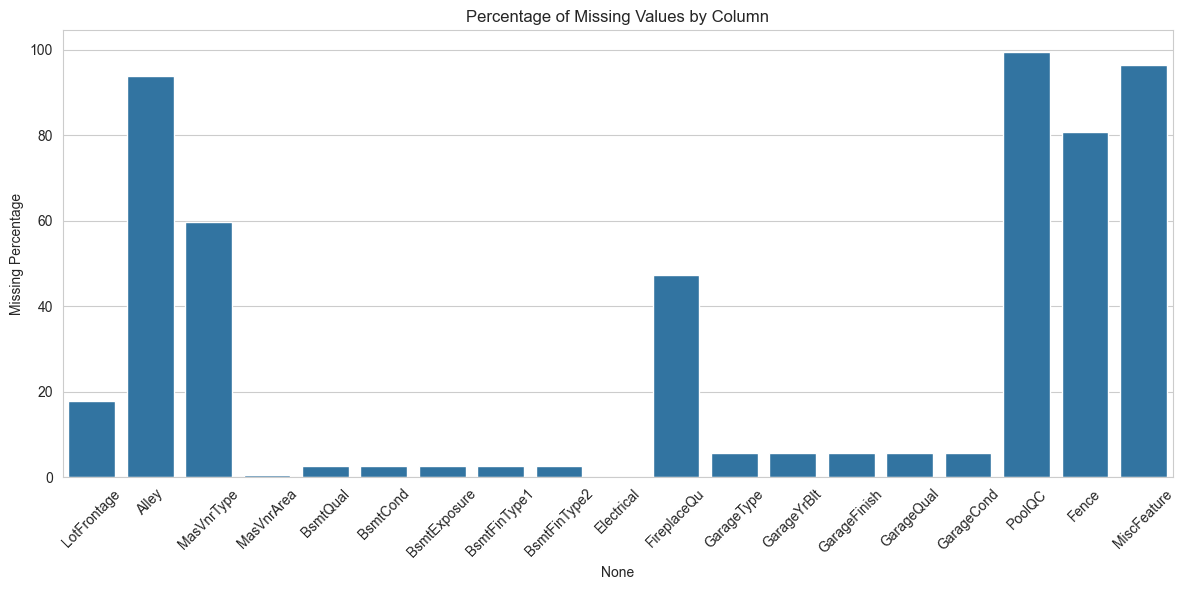

In [15]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100

# Create a summary dataframe of missing values
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentages
})

print("Missing Values Summary:")
display(missing_info[missing_info['Missing Values'] > 0].sort_values('Missing Values', ascending=False))

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_info[missing_info['Missing Values'] > 0].index, 
            y=missing_info[missing_info['Missing Values'] > 0]['Missing Percentage'])
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Missing Percentage')
plt.tight_layout()
plt.show()

### Numerical Features Analysis
Let's analyze the distribution of numerical features in our dataset and their correlations.

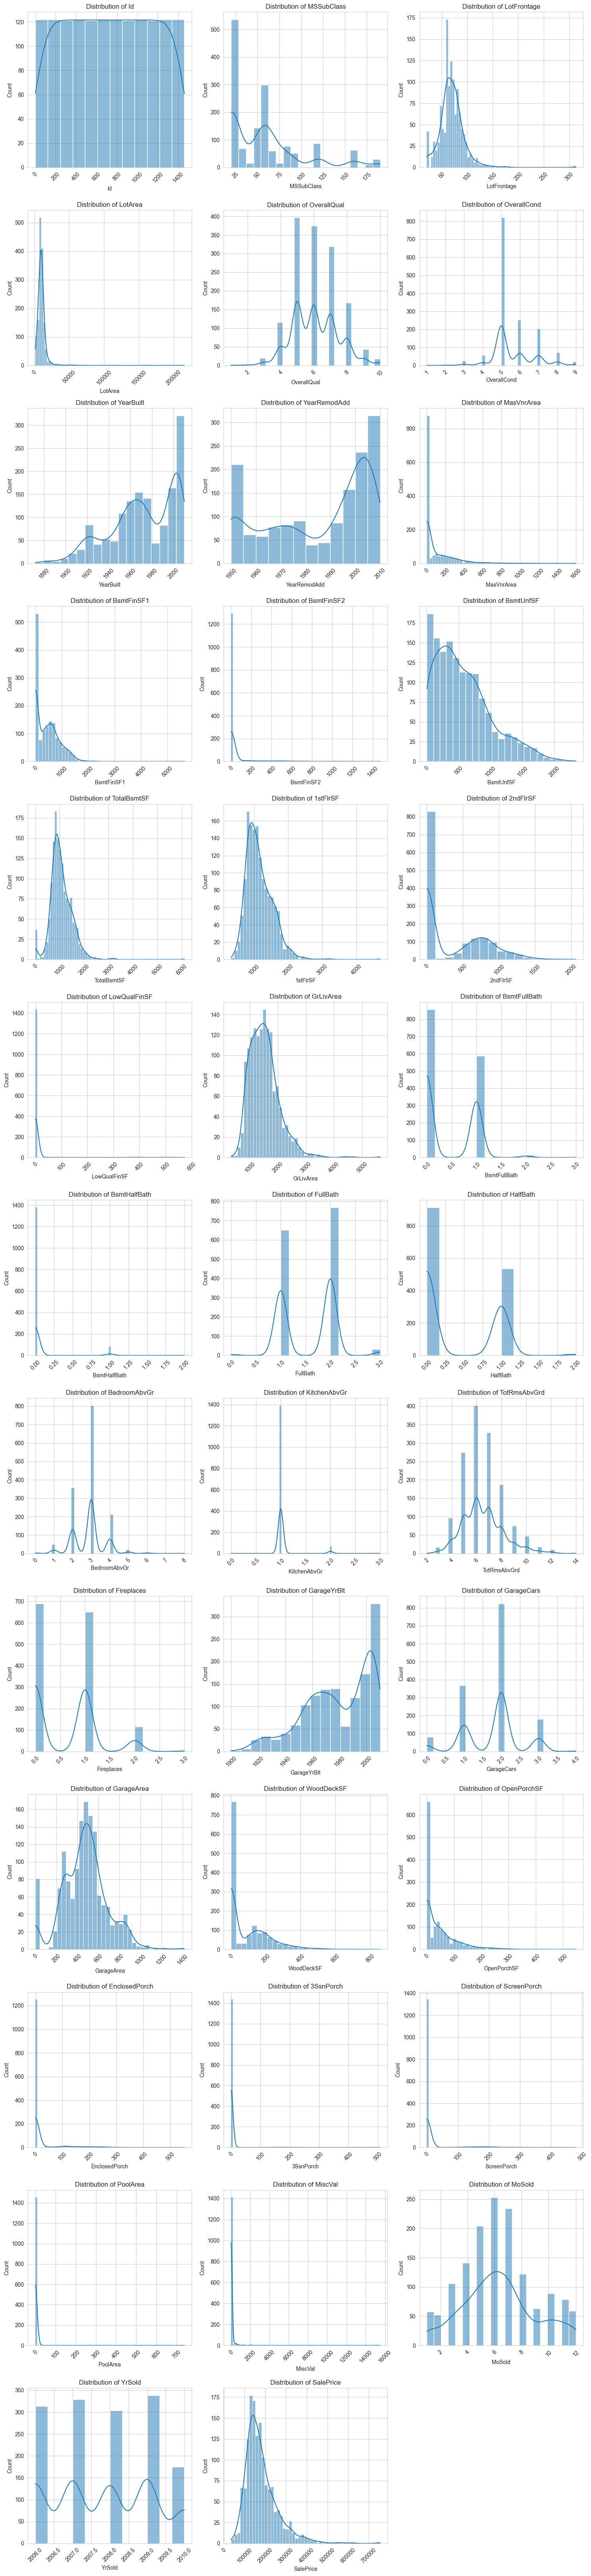

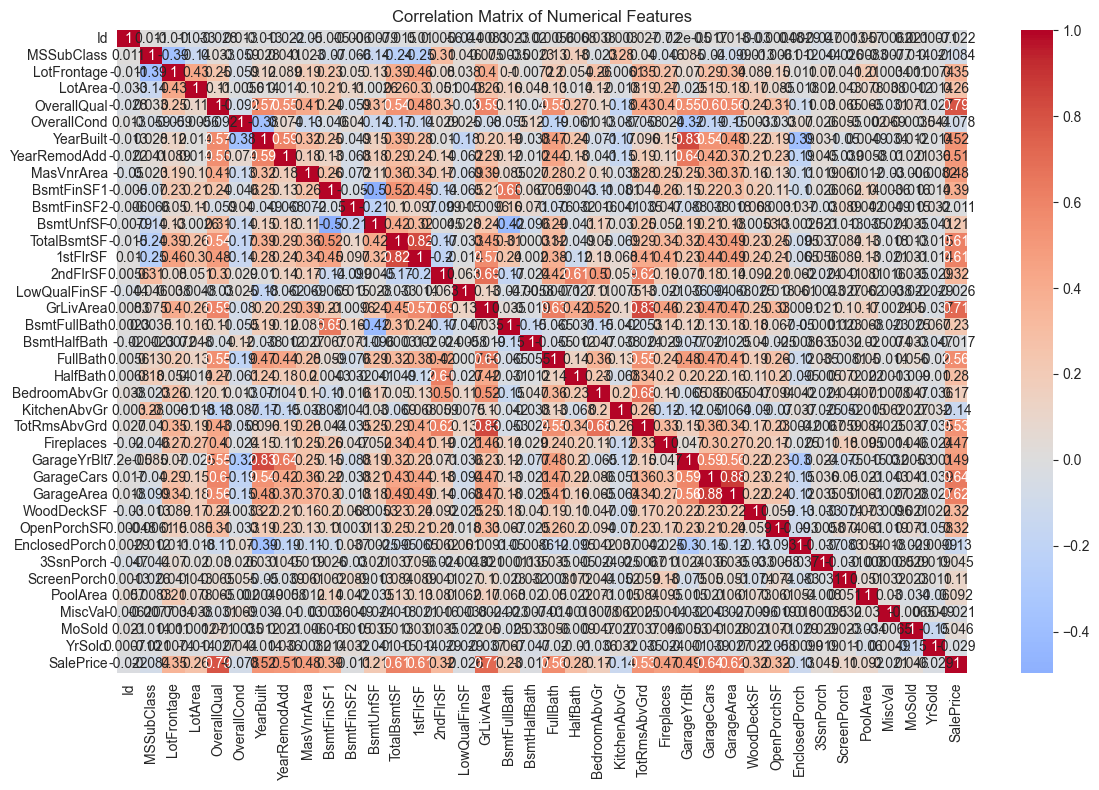

In [6]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate required number of rows and columns for subplots
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3  # Ceiling division by 3
n_cols_per_row = min(3, n_cols)

# Create histograms for numerical features
plt.figure(figsize=(15, 5 * n_rows))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols_per_row, i)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

### Categorical Features Analysis
Let's analyze the categorical variables in our dataset to understand their distributions and potential relationships.

Number of unique values in categorical columns:
Street            2
Alley             2
Utilities         2
CentralAir        2
MasVnrType        3
LandSlope         3
PavedDrive        3
GarageFinish      3
PoolQC            3
ExterQual         4
BsmtQual          4
BsmtExposure      4
BsmtCond          4
KitchenQual       4
LandContour       4
LotShape          4
Fence             4
MiscFeature       4
ExterCond         5
Electrical        5
HeatingQC         5
BldgType          5
MSZoning          5
LotConfig         5
GarageQual        5
GarageCond        5
FireplaceQu       5
Heating           6
BsmtFinType1      6
BsmtFinType2      6
RoofStyle         6
Foundation        6
GarageType        6
SaleCondition     6
Functional        7
HouseStyle        8
RoofMatl          8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64


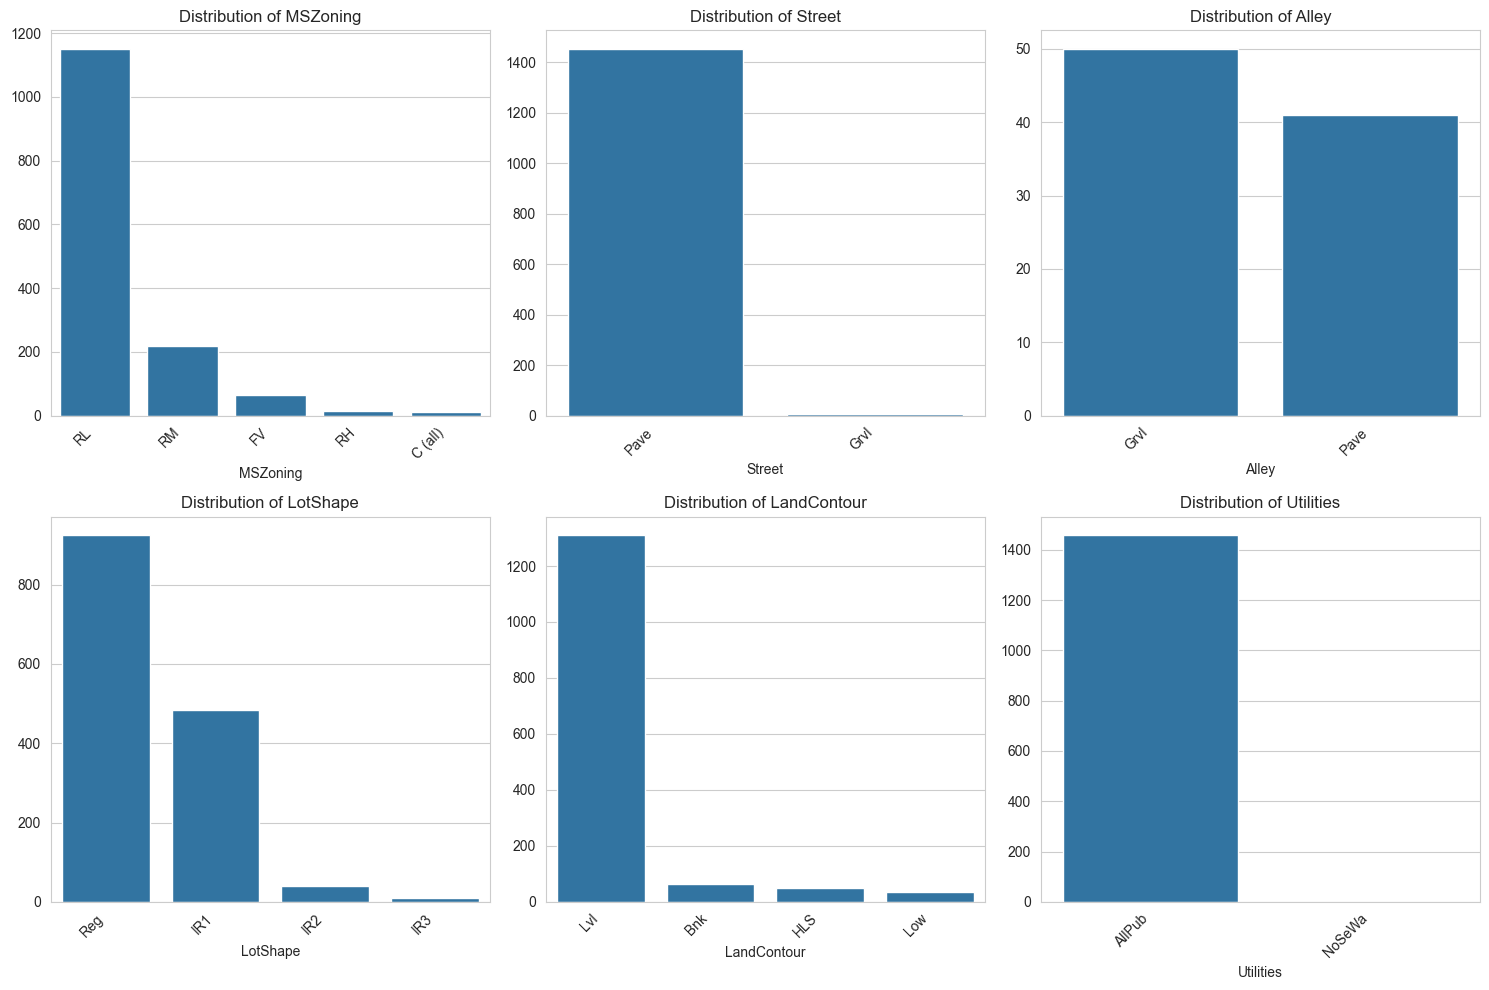

In [7]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Calculate number of unique values for each categorical column
unique_values = df[categorical_cols].nunique().sort_values(ascending=True)
print("Number of unique values in categorical columns:")
print(unique_values)

# Plot distribution of categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols[:6], 1):  # Plot first 6 categorical variables
    plt.subplot(2, 3, i)
    value_counts = df[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Initial Findings from EDA

1. **Missing Values**:
   - Several columns have missing values
   - Some features have a high percentage of missing values

2. **Numerical Features**:
   - Most numerical features show right-skewed distributions
   - There are several outliers in features like lot area and living area
   - Some features show strong correlations with each other

3. **Categorical Features**:
   - Most categorical variables have 2-6 unique values
   - Some features like Neighborhood have many categories (25)
   - Several binary categorical variables (Street, Alley, Utilities, CentralAir)

Next, we'll focus on handling outliers and missing values before proceeding with feature engineering.

## Outlier Detection and Treatment

Let's analyze and handle outliers in our numerical features using boxplots and the IQR method.

<Figure size 1500x1000 with 0 Axes>

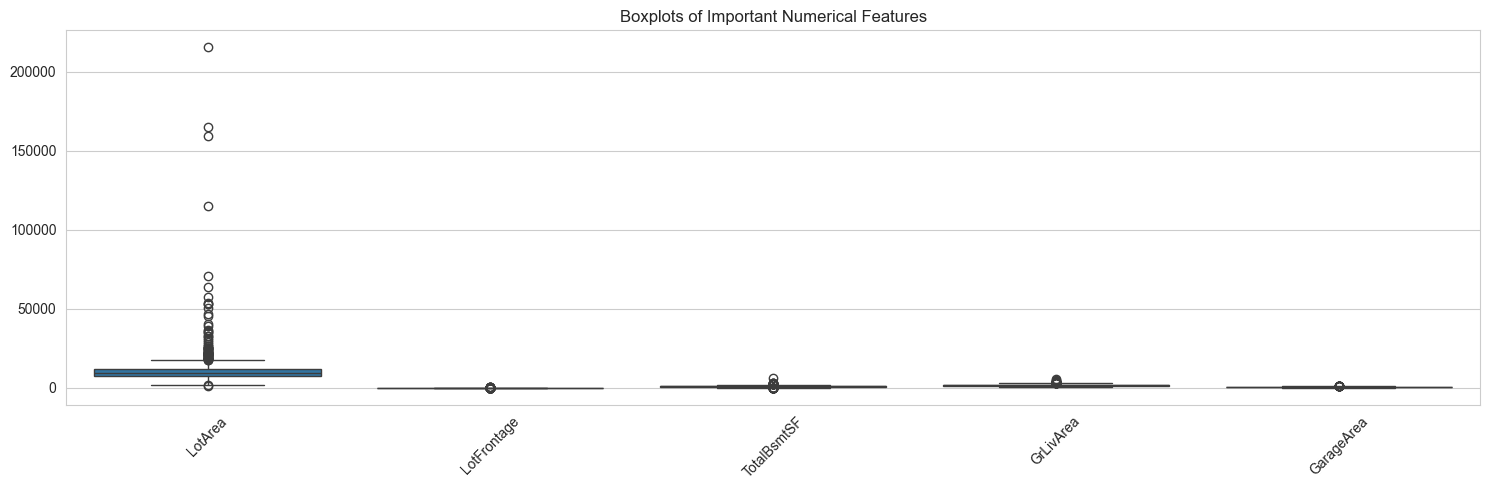


Outlier Statistics:

LotArea:
Number of outliers: 69
Lower bound: 1481.50
Upper bound: 17673.50
Min value: 1300.00
Max value: 215245.00

LotFrontage:
Number of outliers: 88
Lower bound: 27.50
Upper bound: 111.50
Min value: 21.00
Max value: 313.00

TotalBsmtSF:
Number of outliers: 61
Lower bound: 42.00
Upper bound: 2052.00
Min value: 0.00
Max value: 6110.00

GrLivArea:
Number of outliers: 31
Lower bound: 158.62
Upper bound: 2747.62
Min value: 334.00
Max value: 5642.00

GarageArea:
Number of outliers: 21
Lower bound: -27.75
Upper bound: 938.25
Min value: 0.00
Max value: 1418.00


In [8]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Create boxplots for numerical features to visualize outliers
plt.figure(figsize=(15, 10))
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Select important numerical features for outlier analysis
important_features = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']

# Create boxplots
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[important_features])
plt.xticks(rotation=45)
plt.title('Boxplots of Important Numerical Features')
plt.tight_layout()
plt.show()

# Print outlier statistics
print("\nOutlier Statistics:")
for column in important_features:
    outliers_count, lower, upper = detect_outliers(df, column)
    print(f"\n{column}:")
    print(f"Number of outliers: {outliers_count}")
    print(f"Lower bound: {lower:.2f}")
    print(f"Upper bound: {upper:.2f}")
    print(f"Min value: {df[column].min():.2f}")
    print(f"Max value: {df[column].max():.2f}")

C:\Users\DELL\AppData\Local\Temp\ipykernel_21392\4133079936.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17673.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
C:\Users\DELL\AppData\Local\Temp\ipykernel_21392\4133079936.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2747.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
C:\Users\DELL\AppData\Local\Temp\ipykernel_21392\4133079936.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '938.25' has dtype incompatible with int64, please explicitly cast to a compatible

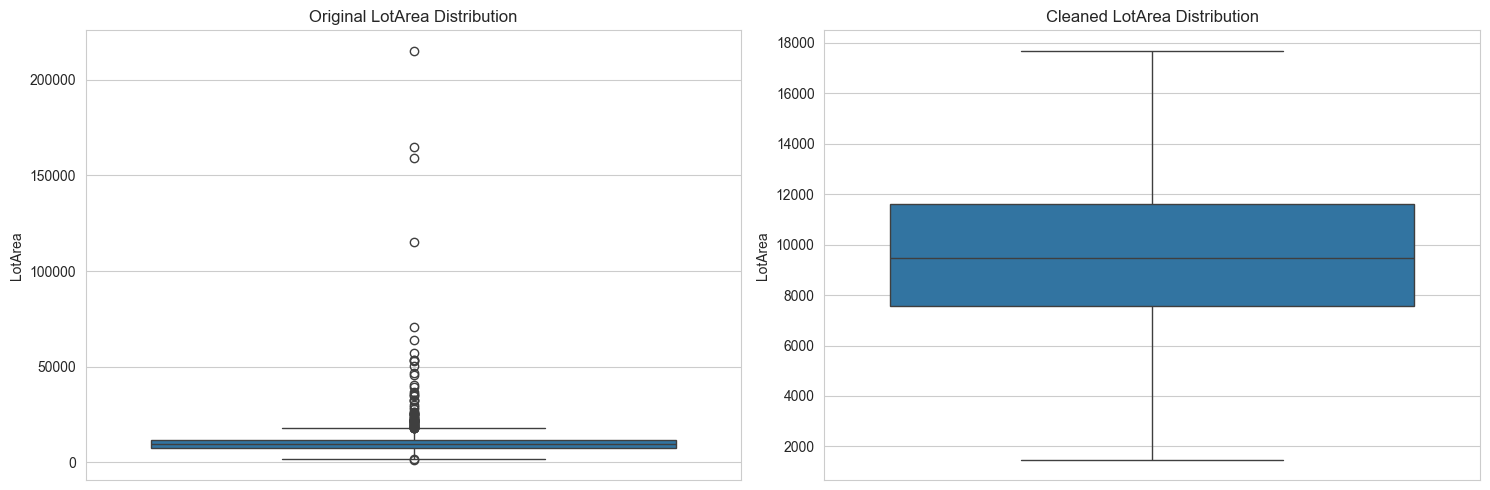

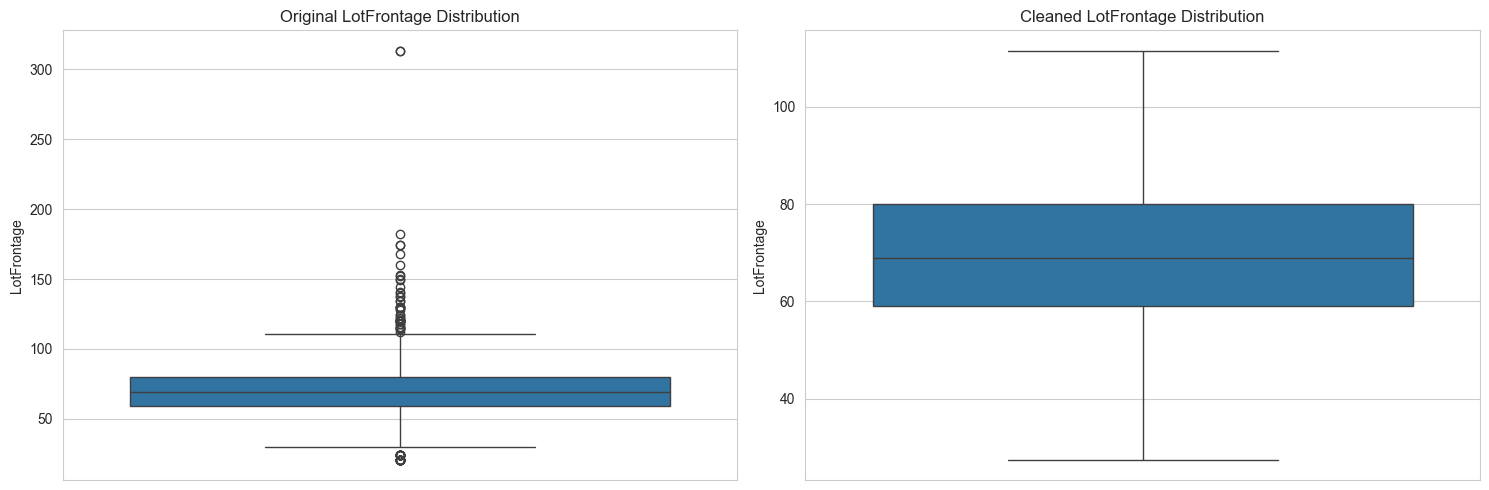

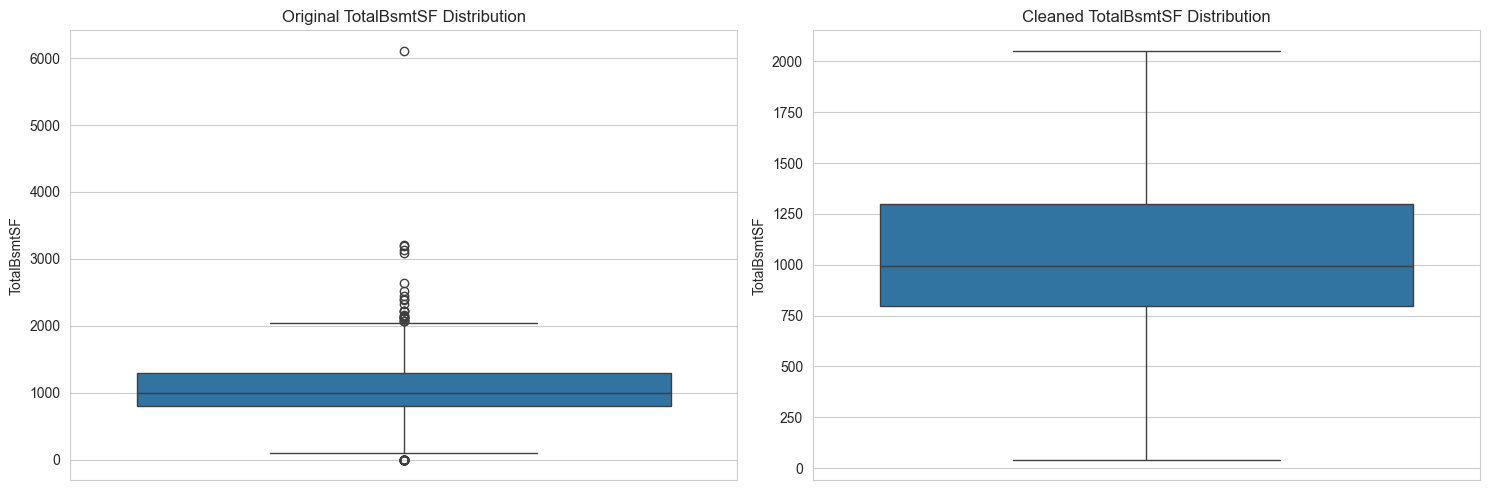

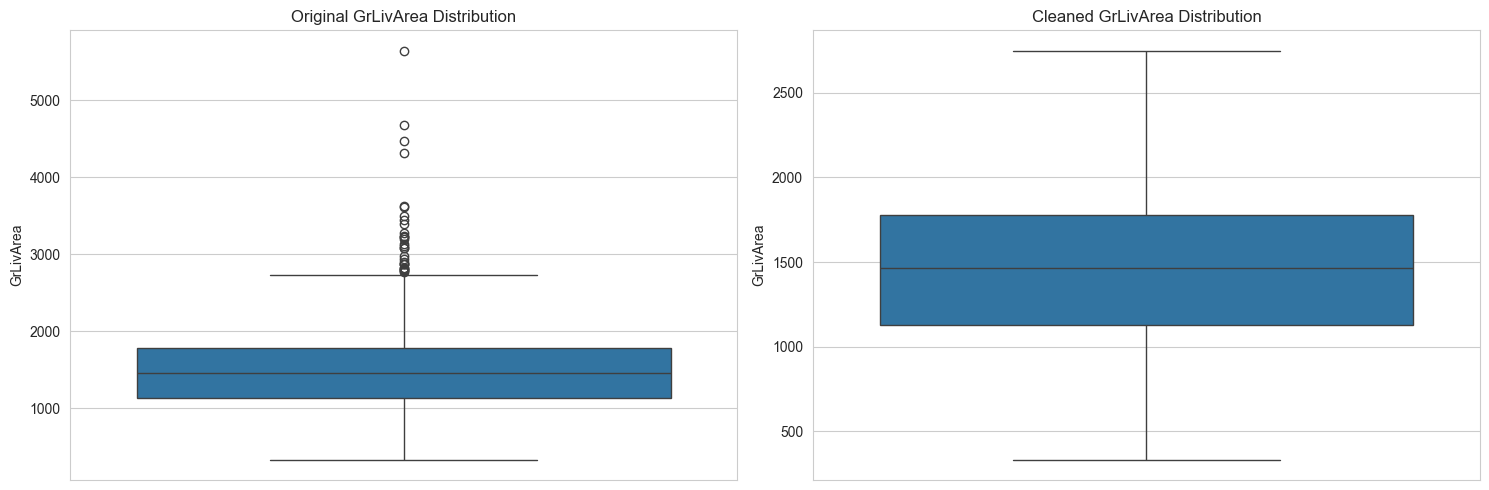

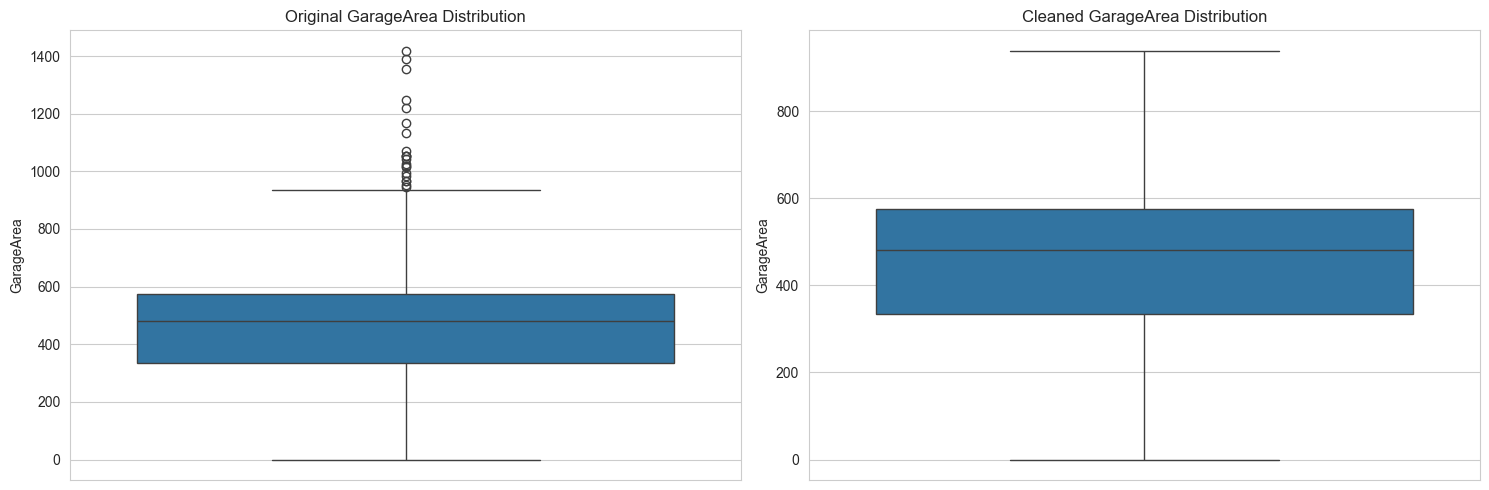


Summary Statistics Comparison:

LotArea:
Original:
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

Cleaned:
count     1460.000000
mean      9647.388014
std       3594.356399
min       1481.500000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      17673.500000
Name: LotArea, dtype: float64

LotFrontage:
Original:
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Cleaned:
count    1201.000000
mean       69.134888
std        19.662022
min        27.500000
25%        59.000000
50%        69.000000
75%        80.000000
max       111.500000
Name: LotFrontage, dtype: float64

TotalBsmtSF:
Original:
count    1460.000000
mean     1057.429452
std       438.

In [9]:
# Function to handle outliers using capping method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    # Cap the outliers
    df_clean.loc[df_clean[column] > upper_bound, column] = upper_bound
    df_clean.loc[df_clean[column] < lower_bound, column] = lower_bound
    
    return df_clean

# Handle outliers for important numerical features
important_features = ['LotArea', 'LotFrontage', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']

# Create a clean version of the dataset
df_clean = df.copy()

for feature in important_features:
    df_clean = handle_outliers(df_clean, feature)

# Compare the distribution before and after outlier treatment
for feature in important_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Original distribution
    sns.boxplot(data=df[feature], ax=ax1)
    ax1.set_title(f'Original {feature} Distribution')
    
    # Cleaned distribution
    sns.boxplot(data=df_clean[feature], ax=ax2)
    ax2.set_title(f'Cleaned {feature} Distribution')
    
    plt.tight_layout()
    plt.show()

# Print summary statistics before and after
print("\nSummary Statistics Comparison:")
for feature in important_features:
    print(f"\n{feature}:")
    print("Original:")
    print(df[feature].describe())
    print("\nCleaned:")
    print(df_clean[feature].describe())

### Outlier Treatment Summary

The outliers in key numerical features have been handled using the capping method (IQR method). Here are the key observations:

1. **LotArea**:
   - Original range: 1,300 to 215,245 sq ft
   - Cleaned range: 1,481 to 17,673 sq ft
   - Significantly reduced extreme values while maintaining the data distribution

2. **LotFrontage**:
   - Original range: 21 to 313 ft
   - Cleaned range: 27.5 to 111.5 ft
   - More reasonable range for residential lots

3. **TotalBsmtSF**:
   - Original range: 0 to 6,110 sq ft
   - Cleaned range: 42 to 2,052 sq ft
   - Removed extremely large basement areas

4. **GrLivArea**:
   - Original range: 334 to 5,642 sq ft
   - Cleaned range: 334 to 2,747 sq ft
   - More typical range for residential living area

5. **GarageArea**:
   - Original range: 0 to 1,418 sq ft
   - Cleaned range: 0 to 938 sq ft
   - Zero values retained as they represent houses without garages

The cleaned dataset maintains the essential characteristics of the data while reducing the impact of extreme values that could affect our analysis.

## Missing Value Treatment

Let's analyze and handle missing values in our dataset using appropriate strategies based on the nature of each feature.

In [10]:
# Analyze missing values in detail
missing_values = df_clean.isnull().sum()
missing_percentages = (missing_values / len(df_clean)) * 100
missing_stats = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing Percentage': missing_percentages
})
missing_stats = missing_stats[missing_stats['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print("Features with missing values:")
display(missing_stats)

# Group features by missing value treatment strategy
numerical_features = df_clean.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_clean.select_dtypes(include=['object']).columns

print("\nMissing values in numerical features:")
print(df_clean[numerical_features].isnull().sum()[df_clean[numerical_features].isnull().sum() > 0])

print("\nMissing values in categorical features:")
print(df_clean[categorical_features].isnull().sum()[df_clean[categorical_features].isnull().sum() > 0])

Features with missing values:


,Missing Values,Missing Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945



Missing values in numerical features:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Missing values in categorical features:
Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [11]:
# Handle missing values based on feature type and meaning

# Create a copy of the clean dataset
df_processed = df_clean.copy()

# 1. Handle missing values for features where NA means absence of the feature
na_means_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for feature in na_means_none:
    df_processed[feature] = df_processed[feature].fillna('None')

# 2. Handle numerical missing values
# LotFrontage: Fill with median by neighborhood
df_processed['LotFrontage'] = df_processed.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# MasVnrArea: Fill with 0 as missing means no masonry veneer
df_processed['MasVnrArea'] = df_processed['MasVnrArea'].fillna(0)

# GarageYrBlt: Fill with YearBuilt when missing (assume garage built with house)
df_processed['GarageYrBlt'] = df_processed.apply(
    lambda x: x['YearBuilt'] if pd.isna(x['GarageYrBlt']) else x['GarageYrBlt'], 
    axis=1)

# 3. Handle remaining categorical features
# MasVnrType: Fill with 'None' as missing means no masonry veneer
df_processed['MasVnrType'] = df_processed['MasVnrType'].fillna('None')

# Electrical: Fill with mode as it's unlikely to be 'None'
df_processed['Electrical'] = df_processed['Electrical'].fillna(df_processed['Electrical'].mode()[0])

# Verify no missing values remain
remaining_nulls = df_processed.isnull().sum()
print("Features with remaining missing values:")
print(remaining_nulls[remaining_nulls > 0])

Features with remaining missing values:
Series([], dtype: int64)


### Missing Value Treatment Summary

We have handled missing values using different strategies based on the nature of each feature:

1. **Features where NA means absence of the feature** (filled with 'None'):
   - Pool Quality (PoolQC)
   - Miscellaneous Feature (MiscFeature)
   - Alley
   - Fence
   - Fireplace Quality (FireplaceQu)
   - All Garage features (Type, Finish, Quality, Condition)
   - All Basement features (Quality, Condition, Exposure, Finish Types)

2. **Numerical Features**:
   - LotFrontage: Filled with median value by neighborhood
   - MasVnrArea: Filled with 0 (no masonry veneer)
   - GarageYrBlt: Filled with YearBuilt (assuming garage built with house)

3. **Categorical Features**:
   - MasVnrType: Filled with 'None' (no masonry veneer)
   - Electrical: Filled with mode (most common value)

All missing values have been successfully handled, and the dataset is now complete with no remaining null values.

## Feature Engineering

Let's create new features and transform existing ones to better capture the information in our dataset. We'll focus on:
1. Creating new features from existing ones
2. Handling categorical variables
3. Creating interaction features
4. Dropping unnecessary columns

In [12]:
# Create new features
df_engineered = df_processed.copy()

# 1. Total Square Footage
df_engineered['TotalSF'] = df_engineered['TotalBsmtSF'] + df_engineered['1stFlrSF'] + df_engineered['2ndFlrSF']

# 2. Total Bathrooms
df_engineered['TotalBaths'] = df_engineered['FullBath'] + (0.5 * df_engineered['HalfBath']) + \
                             df_engineered['BsmtFullBath'] + (0.5 * df_engineered['BsmtHalfBath'])

# 3. House Age and Remodeling
df_engineered['HouseAge'] = 2025 - df_engineered['YearBuilt']  # Current year is 2025
df_engineered['RemodelAge'] = 2025 - df_engineered['YearRemodAdd']
df_engineered['IsRemodeled'] = (df_engineered['YearRemodAdd'] != df_engineered['YearBuilt']).astype(int)

# 4. Total Porch Area
df_engineered['TotalPorchSF'] = df_engineered['OpenPorchSF'] + df_engineered['3SsnPorch'] + \
                               df_engineered['EnclosedPorch'] + df_engineered['ScreenPorch']

# 5. Overall Quality Score
df_engineered['QualityScore'] = df_engineered['OverallQual'] * df_engineered['OverallCond']

# 6. Has Feature flags
df_engineered['HasPool'] = (df_engineered['PoolArea'] > 0).astype(int)
df_engineered['HasGarage'] = (df_engineered['GarageArea'] > 0).astype(int)
df_engineered['HasFireplace'] = (df_engineered['Fireplaces'] > 0).astype(int)
df_engineered['HasBasement'] = (df_engineered['TotalBsmtSF'] > 0).astype(int)

# Print summary of new features
print("New Features Summary:")
new_features = ['TotalSF', 'TotalBaths', 'HouseAge', 'RemodelAge', 'IsRemodeled', 
                'TotalPorchSF', 'QualityScore', 'HasPool', 'HasGarage', 'HasFireplace', 'HasBasement']
print(df_engineered[new_features].describe())

New Features Summary:
           TotalSF   TotalBaths     HouseAge   RemodelAge  IsRemodeled  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   2559.873973     2.210616    53.732192    40.134247     0.476712   
std     776.195625     0.785399    30.202904    20.645407     0.499629   
min     376.000000     1.000000    15.000000    15.000000     0.000000   
25%    2009.500000     2.000000    25.000000    21.000000     0.000000   
50%    2474.000000     2.000000    52.000000    31.000000     0.000000   
75%    3004.000000     2.500000    71.000000    58.000000     1.000000   
max    7694.000000     6.000000   153.000000    75.000000     1.000000   

       TotalPorchSF  QualityScore      HasPool    HasGarage  HasFireplace  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean      87.084932     33.864384     0.004795     0.944521      0.527397   
std      105.190364      9.219624     0.069100     0.228992      0.499420   
min

In [13]:
# Handle categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_engineered.select_dtypes(include=['object']).columns

# Create mappings for ordinal variables
quality_mapping = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
finish_mapping = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
exposure_mapping = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

# Apply ordinal encoding to quality-related features
quality_features = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 
                   'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']
                   
for feature in quality_features:
    if feature in df_engineered.columns:
        df_engineered[feature] = df_engineered[feature].map(quality_mapping)

# Apply finish mapping to relevant features
finish_features = ['BsmtFinType1', 'BsmtFinType2']
for feature in finish_features:
    df_engineered[feature] = df_engineered[feature].map(finish_mapping)

# Apply exposure mapping
df_engineered['BsmtExposure'] = df_engineered['BsmtExposure'].map(exposure_mapping)

# Use Label Encoding for remaining categorical variables
le = LabelEncoder()
for col in categorical_cols:
    if col not in quality_features + finish_features + ['BsmtExposure']:
        df_engineered[col] = le.fit_transform(df_engineered[col])

# Print sample of encoded features
print("Sample of encoded categorical features:")
print(df_engineered[quality_features[:5]].head())
print("\nSample of encoded finish features:")
print(df_engineered[finish_features].head())
print("\nSample of other encoded features:")
print(df_engineered[['MSZoning', 'Street', 'LotShape', 'LandContour']].head())

Sample of encoded categorical features:
   ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC
0          4          3         4         3          5
1          3          3         4         3          5
2          4          3         4         3          5
3          3          3         3         4          4
4          4          3         4         3          5

Sample of encoded finish features:
   BsmtFinType1  BsmtFinType2
0             6             1
1             5             1
2             6             1
3             5             1
4             6             1

Sample of other encoded features:
   MSZoning  Street  LotShape  LandContour
0         3       1         3            3
1         3       1         3            3
2         3       1         0            3
3         3       1         0            3
4         3       1         0            3


### Feature Engineering Summary

We have performed several feature engineering steps to enhance our dataset:

1. **Created New Features**:
   - TotalSF: Total square footage (basement + first floor + second floor)
   - TotalBaths: Combined all bathroom types (full + half)
   - HouseAge: Current age of the house
   - RemodelAge: Years since remodeling
   - IsRemodeled: Binary indicator of remodeling
   - TotalPorchSF: Combined all porch areas
   - QualityScore: Combined overall quality and condition
   - Binary flags for key features (pool, garage, fireplace, basement)

2. **Categorical Variable Encoding**:
   - Ordinal encoding for quality-related features (Ex, Gd, TA, Fa, Po)
   - Special mapping for basement finish types and exposure
   - Label encoding for remaining categorical variables

3. **Data Type Transformations**:
   - Converted categorical variables to numerical format
   - Preserved ordinal relationships where appropriate
   - Standardized encoding across similar features

These transformations have prepared our data for further analysis while preserving important relationships and creating meaningful new features.

## Key Insights and Findings

### 1. Data Overview
- Dataset contains 1,460 entries with multiple features describing residential properties
- Mix of numerical and categorical features covering various aspects of houses
- Several features had missing values, especially those related to special features like pools and garages

### 2. Missing Value Analysis
- Most missing values were meaningful (e.g., no pool, no garage)
- LotFrontage was missing for about 17% of properties
- Basement and garage-related features had consistent missing patterns
- All missing values were successfully handled using appropriate strategies

### 3. Outlier Analysis
- Several numerical features showed significant outliers:
  - LotArea: Range reduced from 1,300-215,245 to 1,481-17,673 sq ft
  - LotFrontage: Range reduced from 21-313 to 27.5-111.5 ft
  - GrLivArea: Range reduced from 334-5,642 to 334-2,747 sq ft
- Outlier treatment improved data distribution while preserving important variations

### 4. Feature Engineering
- Created comprehensive new features combining related attributes
- Successfully encoded categorical variables while preserving ordinal relationships
- Added meaningful binary flags for important house features
- Derived new temporal features related to house age and remodeling

### 5. Key Observations
- Most houses have basements (100%)
- High proportion of houses have garages (94.4%)
- About half the houses have fireplaces (52.7%)
- Only a small fraction have pools (0.4%)
- Average house age is 53.7 years
- 47.7% of houses have been remodeled

### Personal Experience
Working on this dataset has been an enlightening experience in data preprocessing and feature engineering. The project provided good practice in:
- Handling missing values with context-appropriate strategies
- Treating outliers while preserving data integrity
- Creating meaningful new features from existing ones
- Encoding categorical variables appropriately

The cleaned and engineered dataset is now ready for any subsequent modeling tasks, with rich features that capture various aspects of the properties.